# Get Accident Data via Open Data API

In [278]:
import pandas as pd
from sodapy import Socrata

In [279]:
MyAppToken = 'FuCzu5cIpbE8LgmfNlJhuUOPC'
# Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofnewyork.us",
                 MyAppToken,
                 username="yukun.vvan@gmail.com",
                 password="9336@ashinWYK")

In [248]:
# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("qiz3-axqb",select = "date,borough,latitude,location,longitude,number_of_persons_injured",
                     where="borough='MANHATTAN' and date > '2015-12-31' and date < '2017-01-01' and number_of_persons_injured <> 0", 
                     limit=6000, order="date" )

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [249]:
results_df.head()

,borough,date,latitude,location,longitude,number_of_persons_injured
0,MANHATTAN,2016-01-01T00:00:00.000,40.8609571,"{u'type': u'Point', u'coordinates': [-73.92650...",-73.9265034,1
1,MANHATTAN,2016-01-01T00:00:00.000,40.7230221,"{u'type': u'Point', u'coordinates': [-73.99881...",-73.9988131,1
2,MANHATTAN,2016-01-01T00:00:00.000,40.7256734,"{u'type': u'Point', u'coordinates': [-74.00577...",-74.0057798,2
3,MANHATTAN,2016-01-01T00:00:00.000,40.7218863,"{u'type': u'Point', u'coordinates': [-73.97734...",-73.9773477,1
4,MANHATTAN,2016-01-01T00:00:00.000,40.8133899,"{u'type': u'Point', u'coordinates': [-73.95625...",-73.9562587,1


In [250]:
results_df.date = pd.to_datetime(results_df.date)

In [251]:
results_df.groupby(results_df.date.dt.hour).size()

date
0    5160
dtype: int64

In [241]:
results_df.to_csv('accident_2016_Manhattan_injured.csv')

In [344]:
results = client.get("qiz3-axqb",select = "unique_key, date,time,latitude,location,longitude,number_of_persons_injured,\
                                           number_of_persons_killed,vehicle_type_code1,vehicle_type_code2,\
                                           contributing_factor_vehicle_1,contributing_factor_vehicle_2",
                     where="borough='MANHATTAN' and date > '2015-12-31' and date < '2017-01-01'", 
                     limit=50000, order="date" )

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [345]:
len(results_df)

36765

In [346]:
results_df.head()

,contributing_factor_vehicle_1,contributing_factor_vehicle_2,date,latitude,location,longitude,number_of_persons_injured,number_of_persons_killed,time,unique_key,vehicle_type_code1,vehicle_type_code2
0,Backing Unsafely,Unspecified,2016-01-01T00:00:00.000,40.7534818,"{u'type': u'Point', u'coordinates': [-73.98088...",-73.9808885,0,0,20:45,3363630,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE
1,Driver Inattention/Distraction,Unspecified,2016-01-01T00:00:00.000,40.7509908,"{u'type': u'Point', u'coordinates': [-73.99062...",-73.9906233,0,0,22:40,3363629,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON
2,Turning Improperly,Unspecified,2016-01-01T00:00:00.000,40.7503184,"{u'type': u'Point', u'coordinates': [-73.99111...",-73.9911106,0,0,22:15,3363628,PASSENGER VEHICLE,TAXI
3,Illness,Unspecified,2016-01-01T00:00:00.000,40.7597301,"{u'type': u'Point', u'coordinates': [-73.99168...",-73.9916833,0,0,16:50,3363627,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON
4,Turning Improperly,Unspecified,2016-01-01T00:00:00.000,40.7222418,"{u'type': u'Point', u'coordinates': [-73.98628...",-73.9862873,0,0,4:25,3363368,TAXI,TAXI


In [347]:
results_df.date = pd.to_datetime(results_df.date)

In [348]:
results_df.to_csv('accident_2016_Manhattan_all.csv')

In [349]:
results_df.head()

,contributing_factor_vehicle_1,contributing_factor_vehicle_2,date,latitude,location,longitude,number_of_persons_injured,number_of_persons_killed,time,unique_key,vehicle_type_code1,vehicle_type_code2
0,Backing Unsafely,Unspecified,2016-01-01,40.7534818,"{u'type': u'Point', u'coordinates': [-73.98088...",-73.9808885,0,0,20:45,3363630,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE
1,Driver Inattention/Distraction,Unspecified,2016-01-01,40.7509908,"{u'type': u'Point', u'coordinates': [-73.99062...",-73.9906233,0,0,22:40,3363629,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON
2,Turning Improperly,Unspecified,2016-01-01,40.7503184,"{u'type': u'Point', u'coordinates': [-73.99111...",-73.9911106,0,0,22:15,3363628,PASSENGER VEHICLE,TAXI
3,Illness,Unspecified,2016-01-01,40.7597301,"{u'type': u'Point', u'coordinates': [-73.99168...",-73.9916833,0,0,16:50,3363627,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON
4,Turning Improperly,Unspecified,2016-01-01,40.7222418,"{u'type': u'Point', u'coordinates': [-73.98628...",-73.9862873,0,0,4:25,3363368,TAXI,TAXI


### Data cleaning

In [350]:
df = pd.DataFrame(results_df)
df.head()

,contributing_factor_vehicle_1,contributing_factor_vehicle_2,date,latitude,location,longitude,number_of_persons_injured,number_of_persons_killed,time,unique_key,vehicle_type_code1,vehicle_type_code2
0,Backing Unsafely,Unspecified,2016-01-01,40.7534818,"{u'type': u'Point', u'coordinates': [-73.98088...",-73.9808885,0,0,20:45,3363630,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE
1,Driver Inattention/Distraction,Unspecified,2016-01-01,40.7509908,"{u'type': u'Point', u'coordinates': [-73.99062...",-73.9906233,0,0,22:40,3363629,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON
2,Turning Improperly,Unspecified,2016-01-01,40.7503184,"{u'type': u'Point', u'coordinates': [-73.99111...",-73.9911106,0,0,22:15,3363628,PASSENGER VEHICLE,TAXI
3,Illness,Unspecified,2016-01-01,40.7597301,"{u'type': u'Point', u'coordinates': [-73.99168...",-73.9916833,0,0,16:50,3363627,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON
4,Turning Improperly,Unspecified,2016-01-01,40.7222418,"{u'type': u'Point', u'coordinates': [-73.98628...",-73.9862873,0,0,4:25,3363368,TAXI,TAXI


In [351]:
df['Injured'] = [ True if i<>u'0' else False for i in df['number_of_persons_injured']]
df['Killed'] = [ True if i<>u'0' else False for i in df['number_of_persons_killed']]

In [353]:
df.drop(['number_of_persons_injured','number_of_persons_killed','contributing_factor_vehicle_2',
        'vehicle_type_code2'],axis=1,inplace=True)

In [354]:
df.head()

,contributing_factor_vehicle_1,date,latitude,location,longitude,time,unique_key,vehicle_type_code1,Injured,Killed
0,Backing Unsafely,2016-01-01,40.7534818,"{u'type': u'Point', u'coordinates': [-73.98088...",-73.9808885,20:45,3363630,SPORT UTILITY / STATION WAGON,False,False
1,Driver Inattention/Distraction,2016-01-01,40.7509908,"{u'type': u'Point', u'coordinates': [-73.99062...",-73.9906233,22:40,3363629,SPORT UTILITY / STATION WAGON,False,False
2,Turning Improperly,2016-01-01,40.7503184,"{u'type': u'Point', u'coordinates': [-73.99111...",-73.9911106,22:15,3363628,PASSENGER VEHICLE,False,False
3,Illness,2016-01-01,40.7597301,"{u'type': u'Point', u'coordinates': [-73.99168...",-73.9916833,16:50,3363627,PASSENGER VEHICLE,False,False
4,Turning Improperly,2016-01-01,40.7222418,"{u'type': u'Point', u'coordinates': [-73.98628...",-73.9862873,4:25,3363368,TAXI,False,False


In [355]:
df['Hour'] = pd.to_datetime(df.time).dt.hour

In [356]:
df.head()

,contributing_factor_vehicle_1,date,latitude,location,longitude,time,unique_key,vehicle_type_code1,Injured,Killed,Hour
0,Backing Unsafely,2016-01-01,40.7534818,"{u'type': u'Point', u'coordinates': [-73.98088...",-73.9808885,20:45,3363630,SPORT UTILITY / STATION WAGON,False,False,20
1,Driver Inattention/Distraction,2016-01-01,40.7509908,"{u'type': u'Point', u'coordinates': [-73.99062...",-73.9906233,22:40,3363629,SPORT UTILITY / STATION WAGON,False,False,22
2,Turning Improperly,2016-01-01,40.7503184,"{u'type': u'Point', u'coordinates': [-73.99111...",-73.9911106,22:15,3363628,PASSENGER VEHICLE,False,False,22
3,Illness,2016-01-01,40.7597301,"{u'type': u'Point', u'coordinates': [-73.99168...",-73.9916833,16:50,3363627,PASSENGER VEHICLE,False,False,16
4,Turning Improperly,2016-01-01,40.7222418,"{u'type': u'Point', u'coordinates': [-73.98628...",-73.9862873,4:25,3363368,TAXI,False,False,4


In [357]:
df.to_csv('2016_accident_cleaning.csv')

### Initial of accident in 2016

In [370]:
p = pd.DataFrame(df.groupby(df.date.dt.month).size())
p.reset_index(inplace=True)
p.columns = ['month','count']
p.head()

,month,count
0,1,3178
1,2,3195
2,3,3486
3,4,3548
4,5,3437


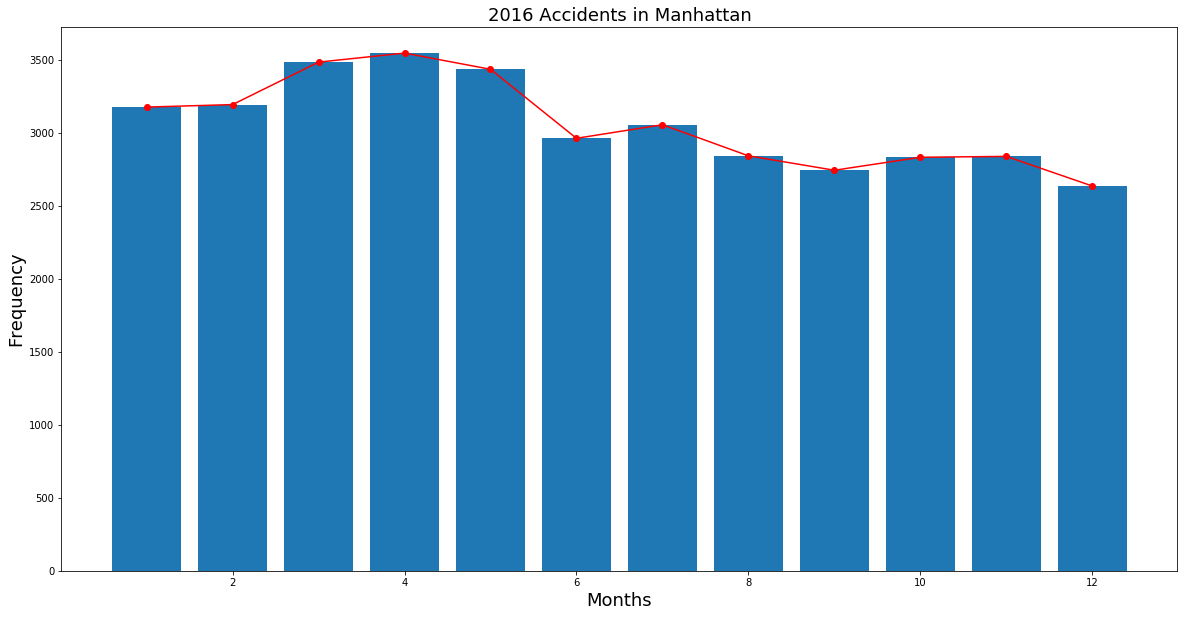

In [369]:
fig = pl.figure(figsize=(20,10))
pl.bar(p.month,p.count)
pl.plot(p.month,p.count,'ro-')
pl.xlabel('Months',size=18)
pl.ylabel('Frequency',size=18)
pl.title('2016 Accidents in Manhattan',size=18)
pl.show()

In [371]:
p = pd.DataFrame(df.groupby('Hour').size())
p.reset_index(inplace=True)
p.columns = ['Hour','Count']
p.head()

,Hour,Count
0,0,1465
1,1,701
2,2,584
3,3,436
4,4,455


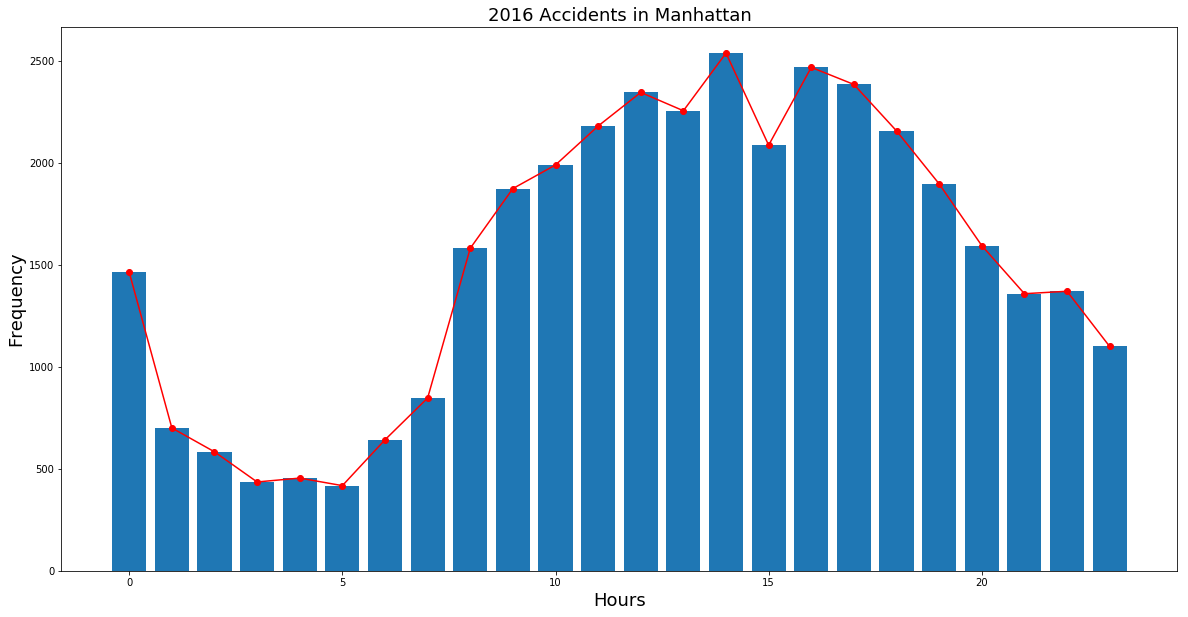

In [372]:
fig = pl.figure(figsize=(20,10))
pl.bar(p.Hour,p.Count)
pl.plot(p.Hour,p.Count,'ro-')
pl.xlabel('Hours',size=18)
pl.ylabel('Frequency',size=18)
pl.title('2016 Accidents in Manhattan',size=18)
pl.show()

In [378]:
p = pd.DataFrame(df.groupby('contributing_factor_vehicle_1').size())
p.reset_index(inplace=True)
p.columns = ['factors','Count']
p.sort_values('Count',ascending=False,inplace=True)
p.head()

,factors,Count
44,Unspecified,19538
8,Driver Inattention/Distraction,5361
25,Other Vehicular,1492
13,Failure to Yield Right-of-Way,1139
41,Turning Improperly,1036


In [379]:
df.groupby('contributing_factor_vehicle_1').size()

contributing_factor_vehicle_1
Accelerator Defective                                       12
Aggressive Driving/Road Rage                                76
Alcohol Involvement                                        176
Animals Action                                              17
Backing Unsafely                                           964
Brakes Defective                                            32
Cell Phone (hand-held)                                       6
Cell Phone (hands-free)                                      2
Driver Inattention/Distraction                            5361
Driver Inexperience                                        502
Driverless/Runaway Vehicle                                  11
Drugs (Illegal)                                             16
Failure to Keep Right                                       37
Failure to Yield Right-of-Way                             1139
Fatigued/Drowsy                                            853
Fell Asleep              

# Initial exploring in Accident data

In [77]:
# accident
accident = pd.DataFrame()
for i in range(31):
    url = "https://data.cityofnewyork.us/resource/qiz3-axqb.json?date=2017-10-" + str(i+1) + "&borough=MANHATTAN"
    tmp = pd.read_json(url)
    accident = pd.concat([accident,tmp])

In [78]:
accident.head()

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,date,latitude,location,...,off_street_name,on_street_name,time,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code
0,MANHATTAN,Following Too Closely,Unspecified,NaN,NaN,NaN,250 WEST 125 STREET,2017-10-01,40.809574,"{u'type': u'Point', u'coordinates': [-73.94977...",...,NaN,NaN,19:30,3768453,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,10027
1,MANHATTAN,Following Too Closely,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,2017-10-01,40.723648,"{u'type': u'Point', u'coordinates': [-73.99103...",...,CHRYSTIE STREET,EAST HOUSTON STREET,7:50,3768418,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,10002
2,MANHATTAN,Unspecified,Unspecified,NaN,NaN,NaN,NaN,2017-10-01,40.806915,"{u'type': u'Point', u'coordinates': [-73.93557...",...,EAST 129 STREET,LEXINGTON AVENUE,7:10,3768032,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,10035
3,MANHATTAN,Obstruction/Debris,NaN,NaN,NaN,NaN,NaN,2017-10-01,40.827057,"{u'type': u'Point', u'coordinates': [-73.95202...",...,RIVERSIDE DRIVE,WEST 145 STREET,14:20,3766524,BICYCLE,NaN,NaN,NaN,NaN,10031
4,MANHATTAN,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,2017-10-01,40.863792,"{u'type': u'Point', u'coordinates': [-73.91942...",...,WEST 206 STREET,10 AVENUE,4:17,3766133,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,10034


In [82]:
accident.groupby('date').size()

date
2017-10-01     80
2017-10-02     77
2017-10-03     85
2017-10-04     86
2017-10-05     79
2017-10-06     81
2017-10-07     78
2017-10-08     72
2017-10-09     57
2017-10-10     84
2017-10-11     87
2017-10-12     71
2017-10-13     85
2017-10-14     70
2017-10-15     60
2017-10-16     84
2017-10-17     83
2017-10-18     89
2017-10-19    105
2017-10-20    115
2017-10-21     76
2017-10-22     65
2017-10-23     96
2017-10-24     92
2017-10-25     89
2017-10-26     79
2017-10-27    104
2017-10-28     60
2017-10-29     83
2017-10-30    104
2017-10-31     77
dtype: int64

In [83]:
accident.to_csv('accident_201710.csv')

In [102]:
accident = pd.read_csv('accident_201710.csv')

In [103]:
accident.keys()

Index([u'Unnamed: 0', u'borough', u'contributing_factor_vehicle_1',
       u'contributing_factor_vehicle_2', u'contributing_factor_vehicle_3',
       u'contributing_factor_vehicle_4', u'contributing_factor_vehicle_5',
       u'cross_street_name', u'date', u'latitude', u'location', u'longitude',
       u'number_of_cyclist_injured', u'number_of_cyclist_killed',
       u'number_of_motorist_injured', u'number_of_motorist_killed',
       u'number_of_pedestrians_injured', u'number_of_pedestrians_killed',
       u'number_of_persons_injured', u'number_of_persons_killed',
       u'off_street_name', u'on_street_name', u'time', u'unique_key',
       u'vehicle_type_code1', u'vehicle_type_code2', u'vehicle_type_code_3',
       u'vehicle_type_code_4', u'vehicle_type_code_5', u'zip_code'],
      dtype='object')

In [104]:
accident.drop([u'borough',u'contributing_factor_vehicle_3',
       u'contributing_factor_vehicle_4', u'contributing_factor_vehicle_5',
       u'number_of_cyclist_injured', u'number_of_cyclist_killed',
       u'number_of_motorist_injured', u'number_of_motorist_killed',
       u'number_of_pedestrians_injured', u'number_of_pedestrians_killed',
       u'unique_key',
       u'vehicle_type_code_3',
       u'vehicle_type_code_4', u'vehicle_type_code_5'],axis=1,inplace=True)

In [105]:
accident.head()

,Unnamed: 0,contributing_factor_vehicle_1,contributing_factor_vehicle_2,cross_street_name,date,latitude,location,longitude,number_of_persons_injured,number_of_persons_killed,off_street_name,on_street_name,time,vehicle_type_code1,vehicle_type_code2,zip_code
0,0,Following Too Closely,Unspecified,250 WEST 125 STREET,2017-10-01,40.809574,"{u'type': u'Point', u'coordinates': [-73.94977...",-73.949776,0,0,NaN,NaN,19:30,PASSENGER VEHICLE,PASSENGER VEHICLE,10027
1,1,Following Too Closely,Driver Inattention/Distraction,NaN,2017-10-01,40.723648,"{u'type': u'Point', u'coordinates': [-73.99103...",-73.991030,0,0,CHRYSTIE STREET,EAST HOUSTON STREET,7:50,PASSENGER VEHICLE,PASSENGER VEHICLE,10002
2,2,Unspecified,Unspecified,NaN,2017-10-01,40.806915,"{u'type': u'Point', u'coordinates': [-73.93557...",-73.935570,0,0,EAST 129 STREET,LEXINGTON AVENUE,7:10,SPORT UTILITY / STATION WAGON,NaN,10035
3,3,Obstruction/Debris,NaN,NaN,2017-10-01,40.827057,"{u'type': u'Point', u'coordinates': [-73.95202...",-73.952020,1,0,RIVERSIDE DRIVE,WEST 145 STREET,14:20,BICYCLE,NaN,10031
4,4,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,2017-10-01,40.863792,"{u'type': u'Point', u'coordinates': [-73.91942...",-73.919420,0,0,WEST 206 STREET,10 AVENUE,4:17,PASSENGER VEHICLE,PASSENGER VEHICLE,10034


In [106]:
accident = accident[accident.longitude<>0]

In [107]:
accident.longitude.describe()

count    2405.000000
mean      -73.975838
std         0.023057
min       -74.017820
25%       -73.993805
50%       -73.981590
75%       -73.958360
max       -73.912605
Name: longitude, dtype: float64

In [100]:
import pylab as pl
% pylab inline

Populating the interactive namespace from numpy and matplotlib


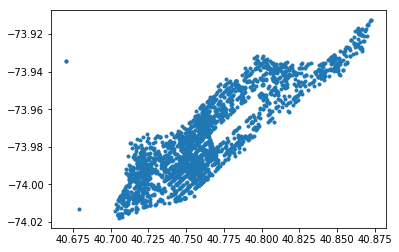

In [108]:
pl.plot(accident.latitude,accident.longitude,'.')
pl.show()

In [151]:
acci_zip = pd.DataFrame(accident.groupby('zip_code',as_index=False).size())
acci_zip.columns = ['count_acci']

In [152]:
acci_zip.sort_values('count_acci',ascending=False,inplace=True)
acci_zip.reset_index(inplace=True)

In [153]:
acci_zip.head()

,zip_code,count_acci
0,10019,164
1,10036,155
2,10018,144
3,10001,142
4,10002,136


# In Oct 2017, top 5 zipcode in Manhattan is 10019,10036,10018,10001,10002

<Container object of 58 artists>

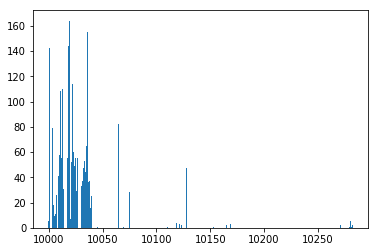

In [149]:
pl.bar(acci_zip['zip_code'],acci_zip['count_acci'])


In [109]:
injured = accident[accident.number_of_persons_injured <> 0]

In [110]:
injured.head()

,Unnamed: 0,contributing_factor_vehicle_1,contributing_factor_vehicle_2,cross_street_name,date,latitude,location,longitude,number_of_persons_injured,number_of_persons_killed,off_street_name,on_street_name,time,vehicle_type_code1,vehicle_type_code2,zip_code
3,3,Obstruction/Debris,NaN,NaN,2017-10-01,40.827057,"{u'type': u'Point', u'coordinates': [-73.95202...",-73.95202,1,0,RIVERSIDE DRIVE,WEST 145 STREET,14:20,BICYCLE,NaN,10031
5,5,Driver Inattention/Distraction,NaN,NaN,2017-10-01,40.722400,"{u'type': u'Point', u'coordinates': [-73.99165...",-73.99165,2,0,CHRYSTIE STREET,STANTON STREET,22:00,PASSENGER VEHICLE,NaN,10002
6,6,Turning Improperly,Unspecified,329 WEST 42 STREET,2017-10-01,40.757656,"{u'type': u'Point', u'coordinates': [-73.99079...",-73.99079,2,0,NaN,NaN,14:05,PASSENGER VEHICLE,NaN,10036
8,8,Following Too Closely,Following Too Closely,NaN,2017-10-01,40.726280,"{u'type': u'Point', u'coordinates': [-73.98034...",-73.98034,1,0,EAST 9 STREET,AVENUE B,12:15,PASSENGER VEHICLE,BICYCLE,10009
30,30,Driver Inattention/Distraction,NaN,NaN,2017-10-01,40.858273,"{u'type': u'Point', u'coordinates': [-73.93182...",-73.93182,1,0,WEST 193 STREET,BROADWAY,19:40,PASSENGER VEHICLE,NaN,10040


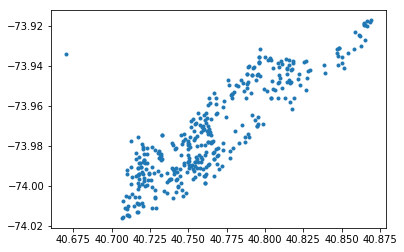

In [111]:
pl.plot(injured.latitude,injured.longitude,'.')
pl.show()

In [154]:
inju_zip = pd.DataFrame(injured.groupby('zip_code').size(),index=None)
inju_zip.columns = ['count_inju']
inju_zip.sort_values('count_inju',ascending=False,inplace=True)
inju_zip.reset_index(inplace=True)
inju_zip.head()

,zip_code,count_inju
0,10002,30
1,10019,26
2,10029,23
3,10036,18
4,10022,17


# Get Real_time speed via Open Data API

In [203]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
#client = Socrata("data.cityofnewyork.us", None)
MyAppToken = 'FuCzu5cIpbE8LgmfNlJhuUOPC'
# Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofnewyork.us",
                 MyAppToken,
                 username="yukun.vvan@gmail.com",
                 password="9336@ashinWYK")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("i4gi-tjb9",where="borough = 'Manhattan' and speed > '25'", limit=2000 ,order="Data_as_of DESC")

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [204]:
results_df.head()

,borough,data_as_of,encoded_poly_line,encoded_poly_line_lvls,id,link_id,link_name,link_points,owner,speed,status,transcom_id,travel_time
0,Manhattan,2017-11-12T23:13:22.000,y{swFvavbMjANlGSvQn@fa@fBhQdA,BBBBBB,2,4616325,11th ave s ganservoort - west st @ spring st,"40.73933,-74.01004 40.73895,-74.01012 40.7376,...",NYC_DOT_LIC,5.59,0,4616325,554
1,Manhattan,2017-11-12T23:13:22.000,slswFpdobMcJ{Fy@_@sBq@kKeBaDc@eB_@iBs@kC{AuBkA...,BBBBBBBBBBBBBBBBBBBBBBBBB,215,4616329,FDR N 25th - 63rd St,"40.7369006,-73.974651 40.73868,-73.973391 40.7...",NYC_DOT_LIC,37.28,0,4616329,182
2,Manhattan,2017-11-12T23:13:22.000,iaxwF|tkbMhBnCtChChGpEjGxE~CvBxEnGlGhFrA|AfAp@...,BBBBBBBBBBBBBBBBBBBBBBBBB,222,4616332,FDR S 63rd - 25th St,"40.7606904,-73.956791 40.7601606,-73.95751 40....",NYC_DOT_LIC,37.28,0,4616332,182
3,Manhattan,2017-11-12T23:13:17.000,i{_xFzefbMyBvGUlACt@Rj@d@f@z@@`@W\g@bA_DTk@b@i...,BBBBBBBBBBBBBBBBBBBBBBB,213,4456450,FDR N - TBB E 116TH STREET - MANHATTAN TRUSS,"40.80069,-73.92878 40.8013005,-73.930181 40.80...",MTA Bridges & Tunnels,37.28,0,4456450,64
4,Manhattan,2017-11-12T23:13:17.000,wiqwFnhvbMvD^xb@lFxQvCrb@hHlLjChHnBPgBh@gA|@Wz...,BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB,445,4456494,West St S Spring St - BBT Manhattan Portal out...,"40.7262006,-74.01112 40.7252805,-74.01128 40.7...",NYC_DOT_LIC,8.69,0,4456494,641


In [171]:
type(results_df.data_as_of[0])

unicode

In [191]:
results_df.borough.unique()

array([u'Staten Island', u'Staten island', u'Brooklyn', u'Queens',
       u'Bronx', u'Manhattan'], dtype=object)